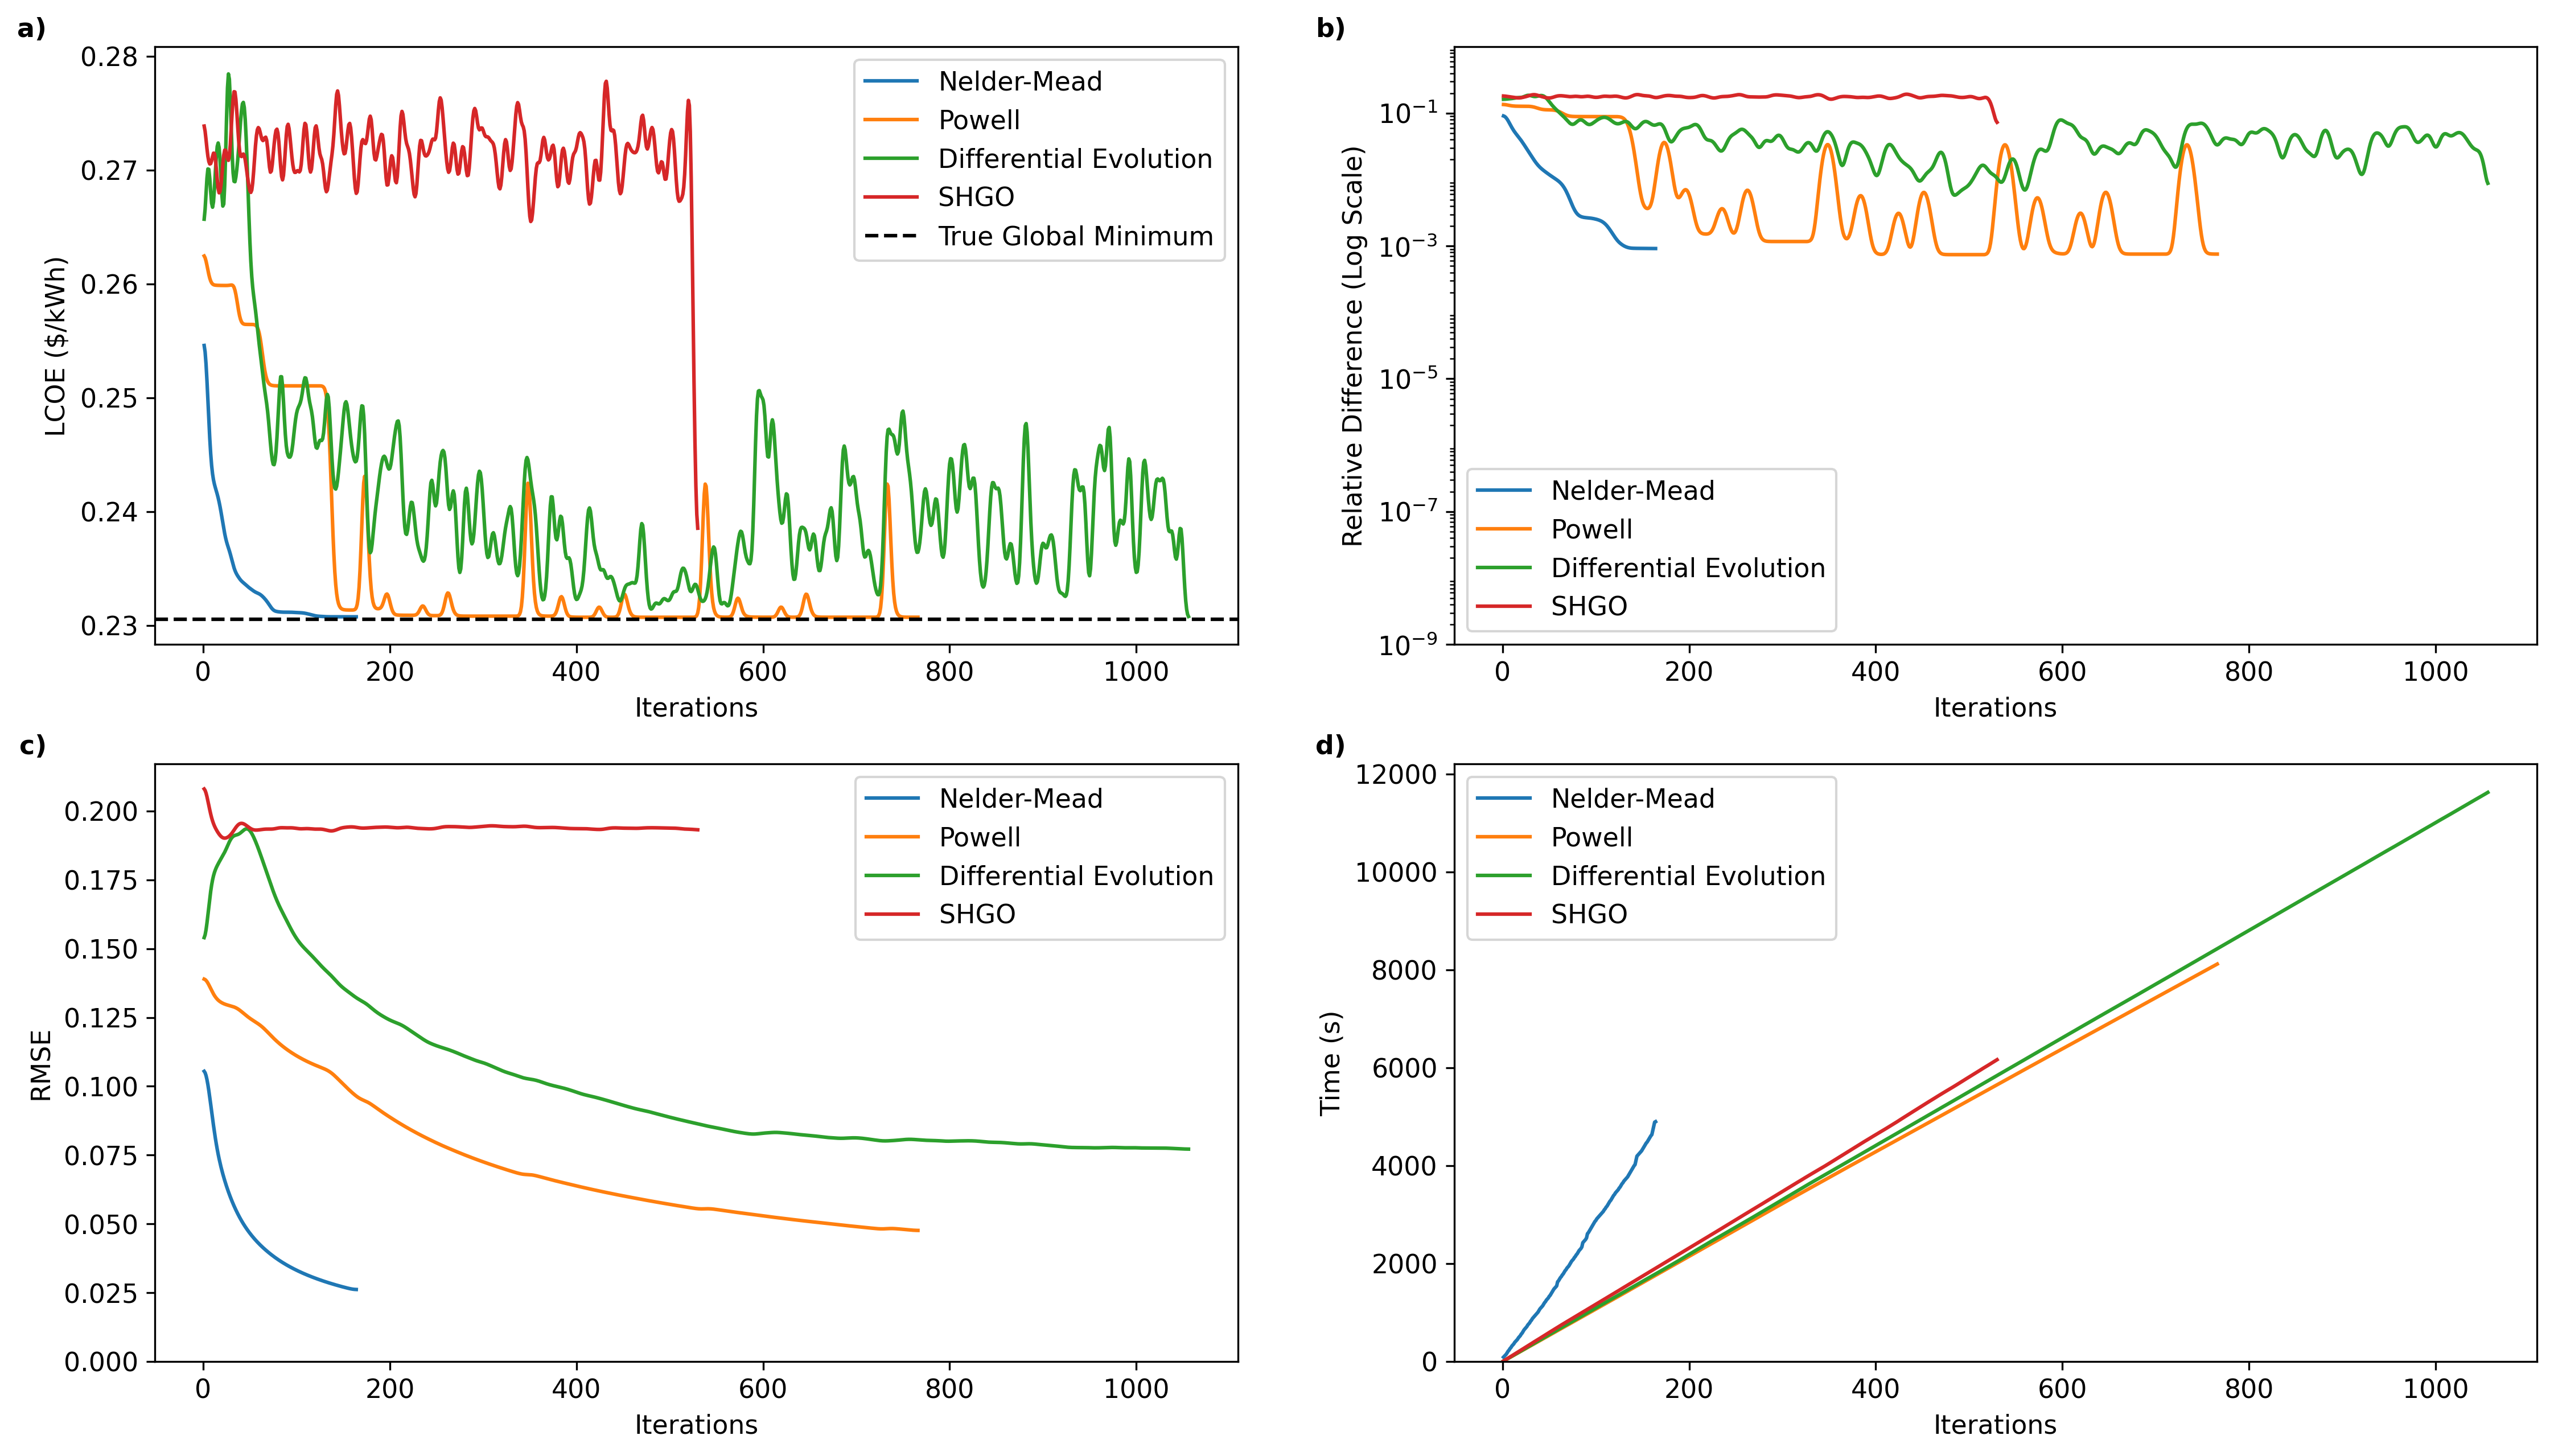

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

# File paths dictionary
file_paths = {
    "Nelder-Mead": "./optimisation_results/Nelder-Mead_iterations_AUS.NSW.333485.csv",
    "Powell": "./optimisation_results/Powell_iterations_AUS.NSW.333485.csv",
    "Differential Evolution": "./optimisation_results/Differential Evolution_iterations_AUS.NSW.333485.csv",
    "SHGO": "./optimisation_results/SHGO_iterations_AUS.NSW.333485.csv"
}

# Define true global minimum for LCOE
true_global_min = 0.230563197

# Load the data from CSV files and extract iteration, LCOE values, and time
data = {}
for method, path in file_paths.items():
    df = pd.read_csv(path)
    iterations = df['Iteration']
    lcoe = df['Objective Value']
    time = df['Time (seconds)']
    data[method] = {
        'iterations': iterations,
        'lcoe': lcoe,
        'rel_diff': np.abs(lcoe - true_global_min) / np.abs(true_global_min),
        'time': time
    }

# Calculate RMSE for each method over the iterations
for method in data:
    data[method]['rmse'] = np.sqrt(np.cumsum(data[method]['rel_diff'] ** 2) / data[method]['iterations'])

fig, axs = plt.subplots(2, 2, figsize=(18, 10), dpi=300)
plt.rcParams.update({'font.size': 11})

labels = ['a)', 'b)', 'c)', 'd)']
metrics = [
    ('lcoe', 'LCOE ($/kWh)'),
    ('rel_diff', 'Relative Difference (Log Scale)'),
    ('rmse', 'RMSE'),
    ('time', 'Time (s)')
]

for i, (metric, ylabel) in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    for method in data:
        # Same sigma value for all methods
        sigma = 3 if i == 0 else 5
            
        if i != 3:  # Apply smoothing to all except time plot
            y_smooth = gaussian_filter1d(data[method][metric], sigma=sigma)
            ax.plot(data[method]['iterations'], y_smooth, label=method)
        else:  # Time plot - no smoothing
            ax.plot(data[method]['iterations'], data[method]['time'], label=method)
    
    if i == 0:
        ax.axhline(y=true_global_min, color='black', linestyle='--', label='True Global Minimum')
    
    ax.set_xlabel('Iterations')
    ax.set_ylabel(ylabel)
    
    if i == 1:  # Log scale for relative difference
        ax.set_yscale('log')
        ax.set_ylim(1e-9, 1e0)  # Set y-axis limits from 10^-9 to 10^0
        ax.yaxis.set_major_locator(plt.LogLocator(base=10.0))
        ax.yaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=100))
        ax.yaxis.set_minor_formatter(plt.NullFormatter())
    elif i in [2, 3]:  # Normal scale for RMSE and Time
        ax.set_ylim(bottom=0)
    
    # Adjust legend position and size
    ax.legend(loc='best')
    # Remove grid
    ax.grid(False)
    # Add subplot label
    ax.text(-0.10, 1.05, labels[i], transform=ax.transAxes, 
            fontsize=11, fontweight='bold', va='top', ha='right')

plt.savefig('./optimization_convergence_comparison.png', dpi=300)
plt.show()

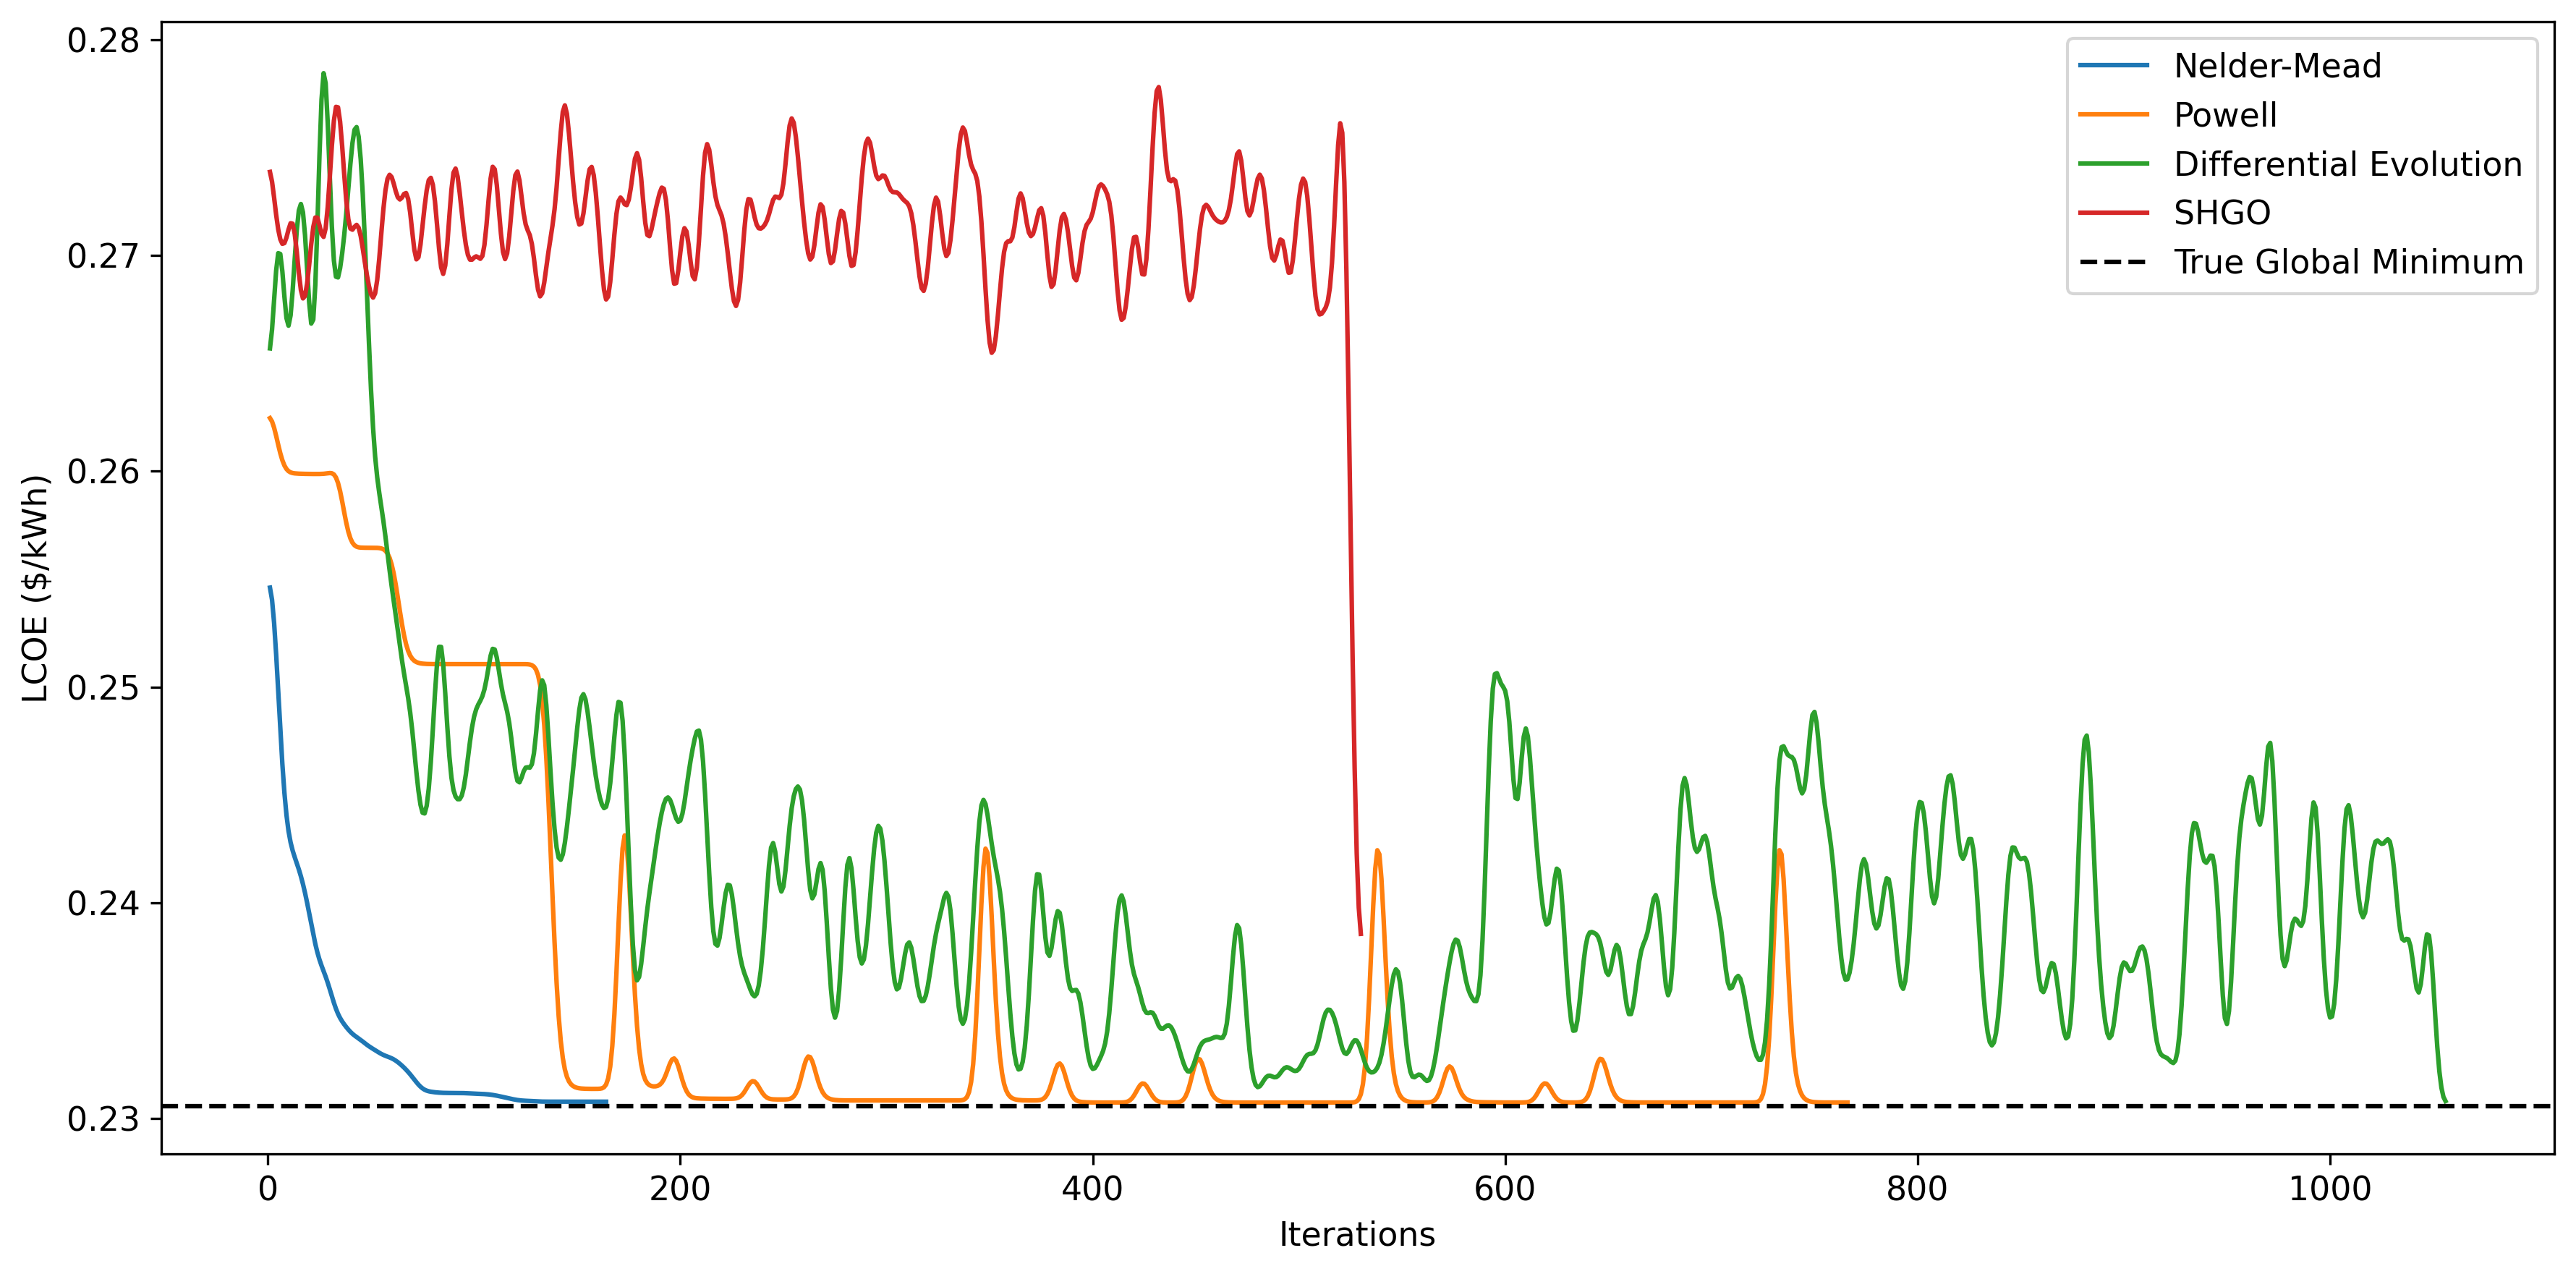

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

# File paths dictionary
file_paths = {
    "Nelder-Mead": "./optimisation_results/Nelder-Mead_iterations_AUS.NSW.333485.csv",
    "Powell": "./optimisation_results/Powell_iterations_AUS.NSW.333485.csv",
    "Differential Evolution": "./optimisation_results/Differential Evolution_iterations_AUS.NSW.333485.csv",
    "SHGO": "./optimisation_results/SHGO_iterations_AUS.NSW.333485.csv"
}

# Define true global minimum for LCOE
true_global_min = 0.230563197

# Load the data from CSV files and extract iteration, LCOE values
data = {}
for method, path in file_paths.items():
    df = pd.read_csv(path)
    iterations = df['Iteration']
    lcoe = df['Objective Value']
    data[method] = {
        'iterations': iterations,
        'lcoe': lcoe
    }

# Create single figure with extra space on right for legend
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)  # Increased width to accommodate legend
plt.rcParams.update({'font.size': 11})

# Plot LCOE data for each method
for method in data:
    # Apply smoothing
    y_smooth = gaussian_filter1d(data[method]['lcoe'], sigma=3)
    ax.plot(data[method]['iterations'], y_smooth, label=method)

# Add true global minimum line
ax.axhline(y=true_global_min, color='black', linestyle='--', label='True Global Minimum')

# Set labels and title
ax.set_xlabel('Iterations')
ax.set_ylabel('LCOE ($/kWh)')

# Position legend outside the figure on the right
ax.legend(loc='upper right')

# Remove grid
ax.grid(False)

# Adjust layout to prevent legend cutoff
plt.tight_layout()

plt.show()